### a

In [2]:
import pandas as pd

wine_data = pd.read_csv("winequality-red.csv", sep=";")  

print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### b

In [3]:
from sklearn.model_selection import train_test_split

X = wine_data.drop('quality', axis = 1)  
y = wine_data['quality']              

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set Shape: ", X_train.shape, y_train.shape)
print("Validation Set Shape: ", X_val.shape, y_val.shape)
print("Test Set Shape: ", X_test.shape, y_test.shape)

Training Set Shape:  (959, 11) (959,)
Validation Set Shape:  (320, 11) (320,)
Test Set Shape:  (320, 11) (320,)


### c

In [4]:
import numpy as np

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

X_train_bias = np.c_[np.ones(X_train_np.shape[0]), X_train_np]

# Closed-form solution: w = (X^T * X)^(-1) * X^T * y
# Compute X^T * X
XtX = np.dot(X_train_bias.T, X_train_bias)

# Compute the inverse of X^T * X
XtX_inv = np.linalg.inv(XtX)

# Compute X^T * y
Xty = np.dot(X_train_bias.T, y_train_np)

# Compute weights (coefficients)
weights = np.dot(XtX_inv, Xty)

# Print the weights
print("Weights (coefficients):")
print(weights)

# Split weights into intercept and coefficients
intercept = weights[0]
coefficients = weights[1:]

print("\nIntercept:", intercept)
print("Coefficients:", coefficients)

# Function to predict using the closed-form solution
def predict(X, weights):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias column
    return np.dot(X_bias, weights)

# Predict on validation or test data
y_pred = predict(X_val.to_numpy(), weights)

# Calculate mean squared error for validation predictions
mse = np.mean((y_val.to_numpy() - y_pred) ** 2)
print("\nMean Squared Error on Validation Data:", mse)

Weights (coefficients):
[ 3.20339193e+01  2.46399813e-02 -1.22503466e+00 -3.40497461e-01
  2.39090277e-02 -1.72273463e+00  2.83923311e-03 -3.09239574e-03
 -2.80998968e+01 -3.22429499e-01  7.14378588e-01  2.80982010e-01]

Intercept: 32.0339193296677
Coefficients: [ 2.46399813e-02 -1.22503466e+00 -3.40497461e-01  2.39090277e-02
 -1.72273463e+00  2.83923311e-03 -3.09239574e-03 -2.80998968e+01
 -3.22429499e-01  7.14378588e-01  2.80982010e-01]

Mean Squared Error on Validation Data: 0.39229584167303005


### d

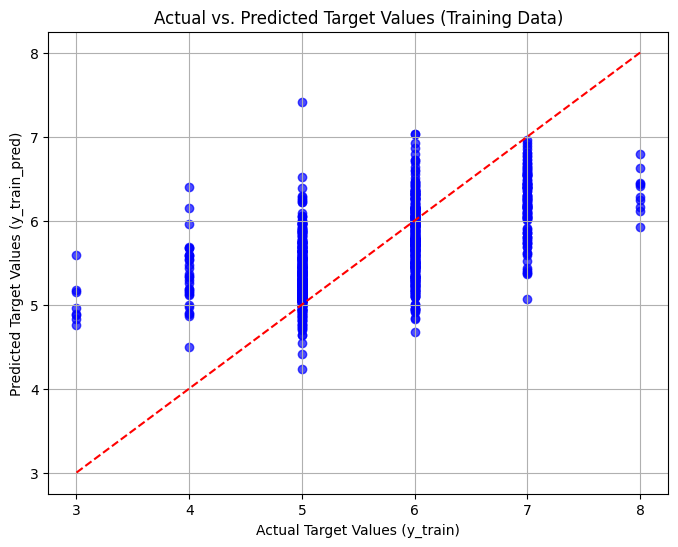

In [5]:
import matplotlib.pyplot as plt

# Predict the target values for the training data
y_train_pred = predict(X_train_np, weights)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train_np, y_train_pred, alpha=0.7, color="blue")
plt.plot([min(y_train_np), max(y_train_np)], [min(y_train_np), max(y_train_np)], color="red", linestyle="--")
plt.xlabel("Actual Target Values (y_train)")
plt.ylabel("Predicted Target Values (y_train_pred)")
plt.title("Actual vs. Predicted Target Values (Training Data)")
plt.grid(True)
plt.show()

Majority of the points are clustered near the red  line, indicating that the model generally makes accurate predictions. The most devaiation occurs for target values  4 and 8, where prediction errors are larger. 

### e

In [6]:
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_actual, y_pred):
    mse = np.mean((y_actual - y_pred) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

# Predict on train and test sets
y_train_pred = predict(X_train_np, weights)  # Predict on training data
y_test_pred = predict(X_test.to_numpy(), weights)  # Predict on test data

# Calculate RMSE for train and test sets
rmse_train = calculate_rmse(y_train_np, y_train_pred)
rmse_test = calculate_rmse(y_test.to_numpy(), y_test_pred)

# Report RMSE values
print(f"Root Mean Square Error (RMSE) on Training Set: {rmse_train}")
print(f"Root Mean Square Error (RMSE) on Test Set: {rmse_test}")

Root Mean Square Error (RMSE) on Training Set: 0.6435674112932496
Root Mean Square Error (RMSE) on Test Set: 0.6836335915791768


### f

Learned Weights (LMS): [ 4.94193336  0.02886485  0.31536     0.93139714 -0.04885031 -0.18221776
  0.3442877  -0.35228266 -0.40488791  0.29819077  0.05830333 -0.01458313]


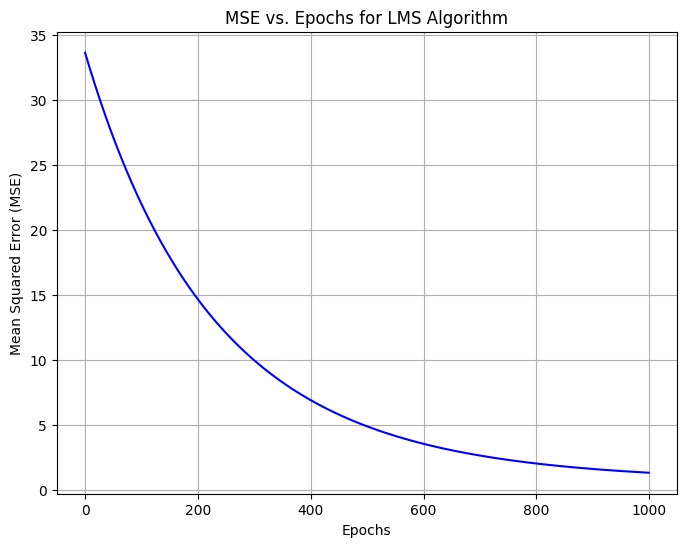

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Function to normalize data
def normalize_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# LMS algorithm implementation
def least_mean_squares(X, y, learning_rate=0.01, epochs=1000):
    """
    Implements the Least-Mean-Squares (LMS) algorithm for linear regression.
    
    Parameters:
    - X: Feature matrix (numpy array) with shape (n_samples, n_features)
    - y: Target vector (numpy array) with shape (n_samples,)
    - learning_rate: Step size for gradient descent
    - epochs: Number of iterations
    
    Returns:
    - weights: Learned weights (numpy array)
    - errors: List of Mean Squared Errors for each epoch
    """
    # Random initialization of weights
    np.random.seed(42)  # For reproducibility
    weights = np.random.randn(X.shape[1] + 1)  # Including bias term

    # Add bias column to X
    X_bias = np.c_[np.ones(X.shape[0]), X]

    # List to store MSE at each epoch
    errors = []

    for epoch in range(epochs):
        # Predict the target values
        y_pred = np.dot(X_bias, weights)

        # Calculate the error (residuals)
        error = y - y_pred

        # Update weights using LMS rule
        gradient = -2 * np.dot(X_bias.T, error) / X.shape[0]
        weights -= learning_rate * gradient

        # Calculate and store the Mean Squared Error (MSE)
        mse = np.mean(error**2)
        errors.append(mse)

    return weights, errors

# Normalize the features
X_train_np_scaled = normalize_features(X_train_np)

# Run the LMS algorithm with scaled features and reduced learning rate
learning_rate = 0.001  # Reduced learning rate
epochs = 1000
weights_lms, mse_errors = least_mean_squares(X_train_np_scaled, y_train_np, learning_rate, epochs)

# Print the learned weights
print("Learned Weights (LMS):", weights_lms)

# Plot the MSE over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(len(mse_errors)), mse_errors, color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Epochs for LMS Algorithm")
plt.grid(True)
plt.show()

### g

In [9]:
# Function to calculate RMSE
def calculate_rmse(y_actual, y_pred):
    mse = np.mean((y_actual - y_pred) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

# Predict on train and test sets
def predict_lms(X, weights):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias column
    return np.dot(X_bias, weights)

# Normalize test features using the same scaler as training
X_test_np_scaled = normalize_features(X_test.to_numpy())

# Predict the target values for train and test sets
y_train_pred = predict_lms(X_train_np_scaled, weights_lms)  # Predictions for training set
y_test_pred = predict_lms(X_test_np_scaled, weights_lms)    # Predictions for test set

# Calculate RMSE for train and test sets
rmse_train = calculate_rmse(y_train_np, y_train_pred)
rmse_test = calculate_rmse(y_test.to_numpy(), y_test_pred)

# Report the RMSE values
print(f"Root Mean Square Error (RMSE) on Training Set: {rmse_train}")
print(f"Root Mean Square Error (RMSE) on Test Set: {rmse_test}")

Root Mean Square Error (RMSE) on Training Set: 1.1409115818190465
Root Mean Square Error (RMSE) on Test Set: 1.1569962878389302
